In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from scipy import stats

In [17]:
def read_rama(path):
    with open(path, 'r') as file:
        phi = []
        psi = []
        aa = []
        for row in file:
            if row.split()[0] == '#':
                continue
            if row.split()[0] == '@': 
                continue
            if row.split()[0] == '@TYPE': 
                continue
            phi.append(float(row.split()[0])) 
            psi.append(float(row.split()[1]))
            aa.append(str(row.split()[2]))

        df = pd.DataFrame(columns=['phi', 'psi', 'aa'])
        df['phi'] = phi
        df['psi'] = psi
        df['aa'] = aa
        df['weight'] = 1 / len(df.index)

        df[['type', 'num']] = df['aa'].str.split('-', 1, expand=True)
        df = df.drop(['aa', 'num'], axis = 1).reset_index(drop=True)
        aminos = df['type'].unique()

        aa_dict = {amino: df[df['type'] == amino].drop('type', axis = 1).reset_index() for amino in aminos}
        
    return aa_dict

In [23]:
def make_matrix(df, positions, dimension, bw):

    values = np.vstack([df['phi'], df['psi']])

    kernel = stats.gaussian_kde(values, bw_method = bw, weights=df['weight'])

    mat = np.reshape(kernel(positions).T, dimension)
    #print(mat)  
    return mat
    
#########################################################################################################

def make_grid():
    X, Y = np.mgrid[-180:180:144j, -180:180:144j]

    positions = np.vstack([X.ravel(), Y.ravel()])

    dimension = X.shape

    return positions, dimension

In [24]:
def mat_maker(amino, dict, positions, dimension):
    
    df = dict[amino]
    mat_amino = make_matrix(df, positions, dimension, 0.25)

    return mat_amino

In [18]:
mod1_dict = read_rama('rama/b2m_aladih_mod01.xvg')
mod2_dict = read_rama('rama/b2m_aladih_mod02.xvg')
mod3_dict = read_rama('rama/b2m_aladih_mod03.xvg')

In [25]:
positions, dimension = make_grid()

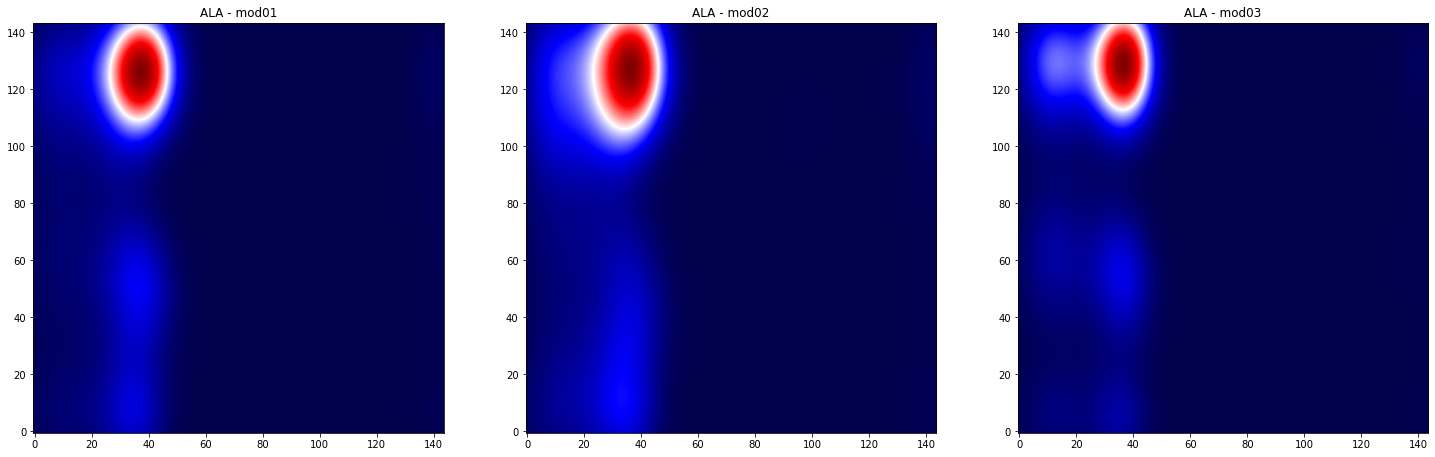

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,25))

ax1.imshow(mat_maker('ALA', mod1_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax1.set_title('%s - mod01' % 'ALA')
ax2.imshow(mat_maker('ALA', mod2_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax2.set_title('%s - mod02' % 'ALA')
ax3.imshow(mat_maker('ALA', mod3_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax3.set_title('%s - mod03' % 'ALA')

plt.savefig('plots/alanine.jpg')

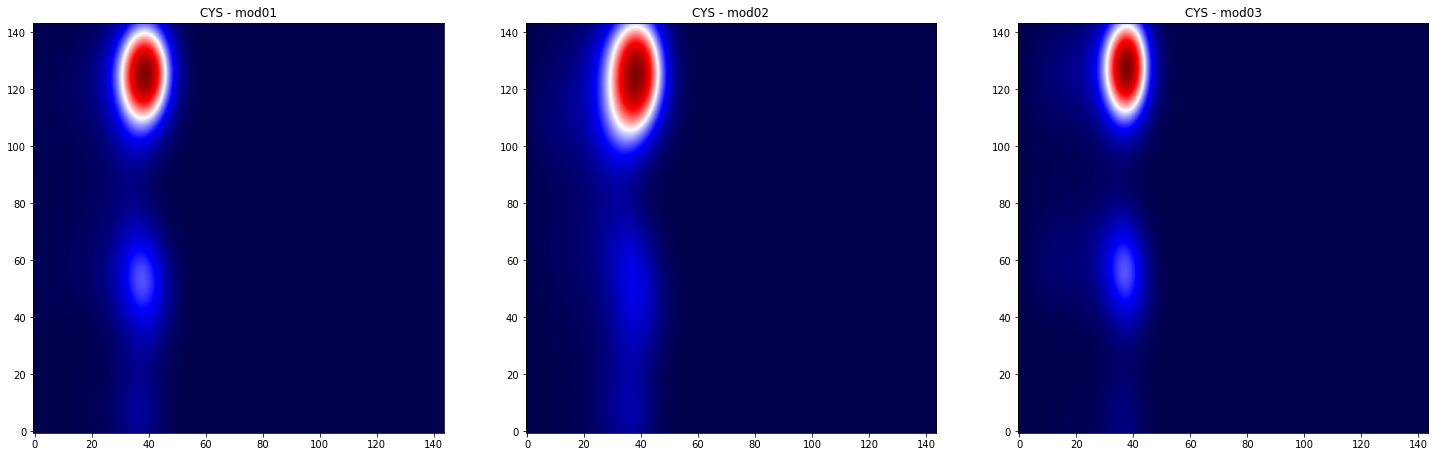

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,25))

ax1.imshow(mat_maker('CYS', mod1_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax1.set_title('%s - mod01' % 'CYS')
ax2.imshow(mat_maker('CYS', mod2_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax2.set_title('%s - mod02' % 'CYS')
ax3.imshow(mat_maker('CYS', mod3_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax3.set_title('%s - mod03' % 'CYS')

plt.savefig('plots/cysteine.jpg')

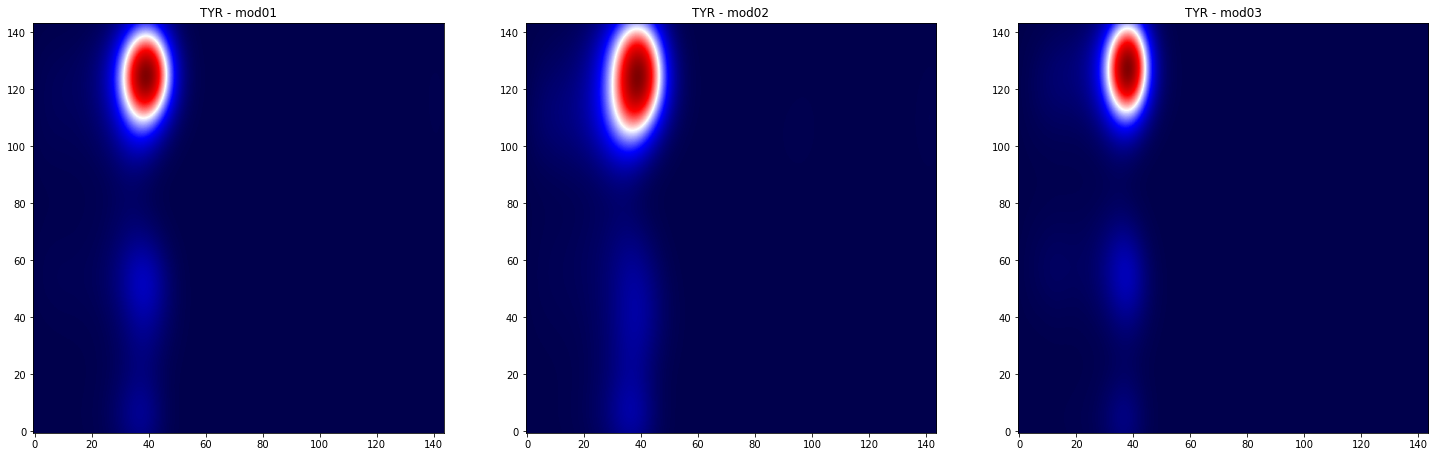

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,25))

ax1.imshow(mat_maker('TYR', mod1_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax1.set_title('%s - mod01' % 'TYR')
ax2.imshow(mat_maker('TYR', mod2_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax2.set_title('%s - mod02' % 'TYR')
ax3.imshow(mat_maker('TYR', mod3_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax3.set_title('%s - mod03' % 'TYR')

plt.savefig('plots/tyrosine.jpg')

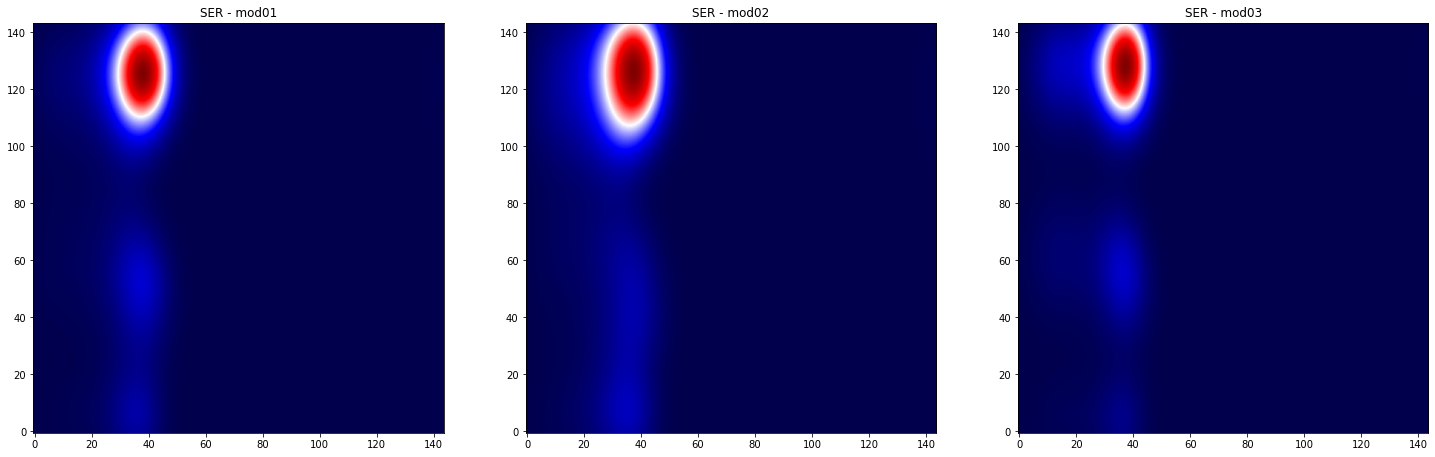

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,25))

ax1.imshow(mat_maker('SER', mod1_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax1.set_title('%s - mod01' % 'SER')
ax2.imshow(mat_maker('SER', mod2_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax2.set_title('%s - mod02' % 'SER')
ax3.imshow(mat_maker('SER', mod3_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax3.set_title('%s - mod03' % 'SER')

plt.savefig('plots/serine.jpg')

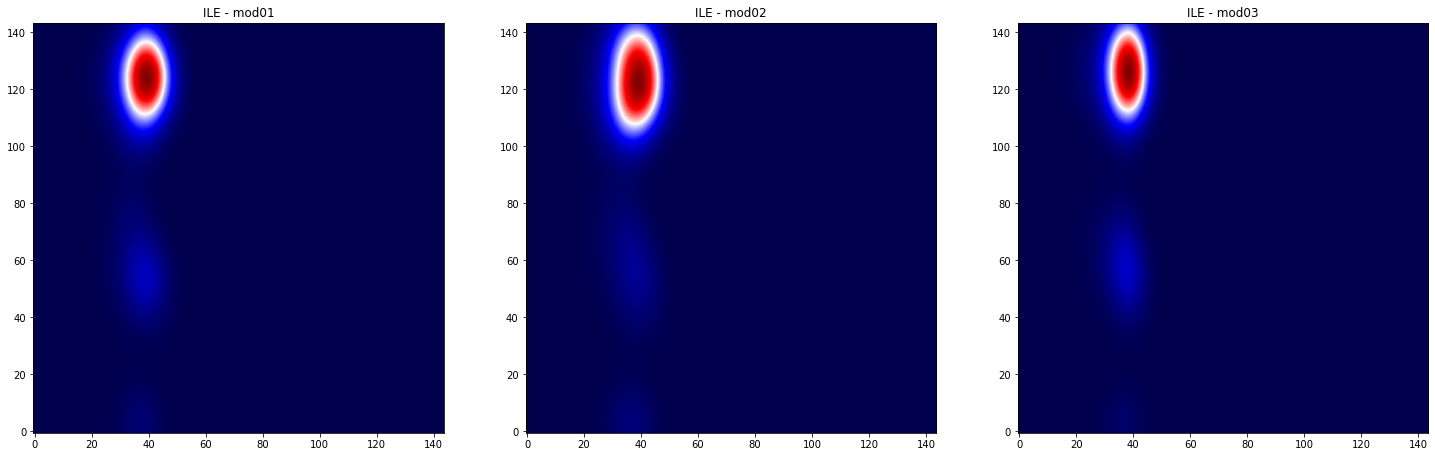

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,25))

ax1.imshow(mat_maker('ILE', mod1_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax1.set_title('%s - mod01' % 'ILE')
ax2.imshow(mat_maker('ILE', mod2_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax2.set_title('%s - mod02' % 'ILE')
ax3.imshow(mat_maker('ILE',  mod3_dict, positions, dimension).T, interpolation='gaussian', origin='lower', cmap='seismic')
ax3.set_title('%s - mod03' % 'ILE')

plt.savefig('plots/isoleucine.jpg')